In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
import scipy.stats
import datetime

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1})
pd.options.display.max_rows = 4000

In [3]:
df = pd.read_excel('botox database.xlsx')

# Wrangling

In [5]:
df['Mirabegron'] = df['Mirabegron'].replace(['N', 'Y'], [0, 1])
df['Anticholinergics'] = df['Anticholinergics'].replace(['N', 'Y'], [0, 1])
df['DO'] = df['DO'].replace(['N', 'Y'], [0, 1])
df['BOO'] = df['BOO'].replace(['N', 'Y'], [0, 1])
df['Neuropathic'] = df['Neuropathic'].replace(['N', 'Y'], [0, 1])
df['SUI'] = df['SUI'].replace(['N', 'Y'], [0, 1])
df['UUI'] = df['UUI'].replace(['N', 'Y'], [0, 1])
df['Incontinence surgery'] = df['Incontinence surgery'].replace(['N', 'Y'], [0, 1])
df['Hysterectomy'] = df['Hysterectomy'].replace(['N', 'Y'], [0, 1])
df['Previous bladder outflow surgery'] = df['Previous bladder outflow surgery'].replace(['N', 'Y'], [0, 1])
df['PPI'] = df['PPI'].replace(['N', 'Y'], [0, 1])
df['Middle lobe?'] = df['Middle lobe?'].replace(['N', 'Y'], [0, 1])
df['CISC'] = df['CISC'].replace(['N', 'Y'], [0, 1])

In [7]:
df.count()

MRN                                 109
NHS Number                          109
Name                                109
Gender                              109
DOB                                 109
Age                                 109
Diagnosis                           109
Mirabegron                          109
Anticholinergics                    109
DO                                  108
BOO                                 108
Neuropathic                         109
LTC/SPC                             109
Prior ISC                           109
SUI                                 108
UUI                                 109
PVR                                 107
Qmax                                 84
Incontinence surgery                108
Hysterectomy                         54
Previous bladder outflow surgery     54
PPI                                  55
Prostate size (ml)                   46
Middle lobe?                         53
OAB pre                              42


In [8]:
df['log PVR'] = np.log10(df['PVR']+1)

In [9]:
df['PVR>=50'] = [1 if x >= 50 else 0 for x in df['PVR']]

In [10]:
df[['PVR', 'log PVR', 'PVR>=50']]

,PVR,log PVR,PVR>=50
0,0.0,0.000000,0
1,0.0,0.000000,0
2,11.0,1.079181,0
3,98.0,1.995635,1
4,250.0,2.399674,1
5,90.0,1.959041,1
6,130.0,2.117271,1
7,0.0,0.000000,0
8,161.0,2.209515,1
9,NaN,NaN,0


In [11]:
df['Dose>100'] = [1 if x>100 else 0 for x in df['Dose']]

In [12]:
df[['Dose', 'Dose>100']]

,Dose,Dose>100
0,100,0
1,200,1
2,200,1
3,300,1
4,150,1
5,100,0
6,100,0
7,100,0
8,100,0
9,200,1


In [13]:
df['Age>=65'] = [1 if x >=70 else 0 for x in df['Age']]

In [14]:
def prostate(df):
    if df['Gender'] == 0:
        return 0
    elif df['PPI'] == 1:
        return 0
    else:
        return 1

In [15]:
df['Prostate'] = df.apply(prostate, axis=1)

In [16]:
df[['Prostate', 'Gender', 'PPI']]

,Prostate,Gender,PPI
0,1,1,0.0
1,0,0,NaN
2,1,1,0.0
3,0,0,NaN
4,0,1,1.0
5,0,0,NaN
6,1,1,0.0
7,0,1,1.0
8,0,0,NaN
9,1,1,0.0


In [17]:
dfF = df[df['Gender']==0]

In [18]:
dfM = df[df['Gender']==1]

# Demographics

In [19]:
def Counts(df, var):
    counts = df[var].value_counts()
    percent = df[var].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    return pd.DataFrame({'N': counts, '%': percent}) 

In [20]:
df['Gender'].value_counts()

1    55
0    54
Name: Gender, dtype: int64

In [21]:
df['Age'].describe()

count    109.000000
mean      59.735132
std       17.077601
min        0.000000
25%       49.303217
50%       64.079398
75%       72.041068
max       86.904860
Name: Age, dtype: float64

In [22]:
df['PVR'].describe()

count    107.000000
mean      40.420561
std       65.366317
min        0.000000
25%        0.000000
50%       11.000000
75%       56.000000
max      369.000000
Name: PVR, dtype: float64

<AxesSubplot:>

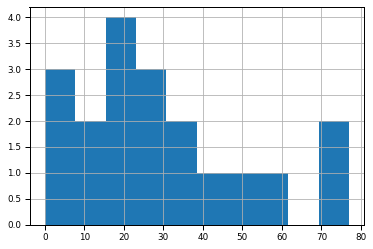

In [23]:
df['Prostate size (ml)'][df['CISC']==1].hist()

In [25]:
Counts(df, "Dose")

,N,%
100,85,78.0%
200,14,12.8%
50,4,3.7%
150,3,2.8%
300,2,1.8%
250,1,0.9%


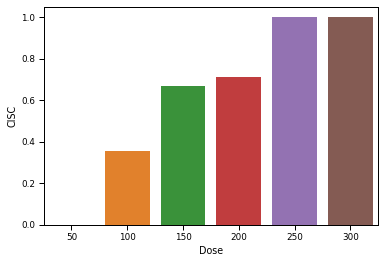

In [26]:
sns.barplot(x="Dose", y="CISC", data=df, ci=None)
plt.savefig('./graph/dose.jpg', dpi=300)

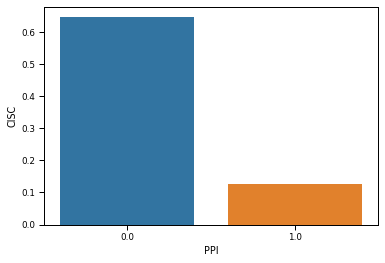

In [27]:
sns.barplot(x="PPI", y="CISC", data=df, ci=None)
plt.savefig('./graph/PPI.jpg', dpi=300)

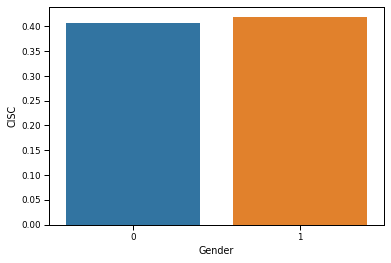

In [28]:
sns.barplot(x="Gender", y="CISC", data=df, ci=None)
plt.savefig('./graph/Gender.jpg', dpi=300)

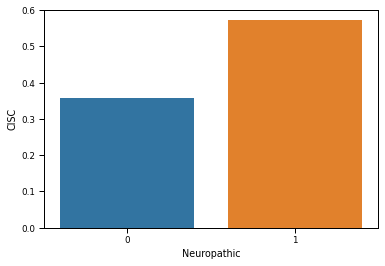

In [29]:
sns.barplot(x="Neuropathic", y="CISC", data=df, ci=None)
plt.savefig('./graph/Neuropathic.jpg', dpi=300)

In [30]:
Counts(dfF, "CISC")

,N,%
0,32,59.3%
1,22,40.7%


In [31]:
Counts(dfM, "CISC")

,N,%
0,32,58.2%
1,23,41.8%


In [32]:
Counts(df, 'CISC')

,N,%
0,64,58.7%
1,45,41.3%


In [33]:
cont=pd.crosstab(dfM['PPI'], dfM['CISC'])
cont

CISC,0,1
PPI,,
0.0,11,20
1.0,21,3


In [34]:
Counts(df, "CISC")

,N,%
0,64,58.7%
1,45,41.3%


In [35]:
Counts(df, "Incontinence surgery")

,N,%
0.0,97,89.8%
1.0,11,10.2%


In [36]:
Counts(df, "Neuropathic")

,N,%
0,81,74.3%
1,28,25.7%


In [37]:
df['CISC'][df['PPI']==1].value_counts(normalize=True)

0    0.875
1    0.125
Name: CISC, dtype: float64

In [38]:
df['CISC'][df['PPI']==0].value_counts(normalize=True)

1    0.645161
0    0.354839
Name: CISC, dtype: float64

In [39]:
df['CISC'][df['Gender']==0].value_counts(normalize=True)

0    0.592593
1    0.407407
Name: CISC, dtype: float64

In [40]:
df['CISC'][df['Prostate']==0].value_counts(normalize=True)

0    0.679487
1    0.320513
Name: CISC, dtype: float64

Of men without RARP, CISC rates were 64.5%
Of men with RARP, CISC rates were 12.5%
Female CISC rates were 40.7%
Of people without prostates, CISC rates were 32%

# Analysis

In [41]:
def LogUni(s_variables, d_variable, df): #d_variable is the dependent variable
    summary = pd.DataFrame()
    for x in s_variables:
        df_u = df[pd.notnull(df[x])]
        df_u = df_u[pd.notnull(df_u[d_variable])]
        y = df_u[d_variable]
        X = sm.add_constant(df_u[x]) #important to add the constant - this is automatically added in smf
        logmodel=sm.Logit(y, X).fit()
        params = logmodel.params
        conf = logmodel.conf_int(alpha =0.05)
        conf['Odds Ratio'] = params
        conf = np.exp(conf)
        conf['95% CI'] = ['{:.2f} - {:.2f}'.format(conf.iloc[x, 0], conf.iloc[x, 1]) for x in range(len(conf))]
        conf['P-value'] = logmodel.pvalues
        conf.columns = ['5%', '95%', 'Odds Ratio', '95% CI', 'P-value']
        summary = summary.append(conf.iloc[1])
    display(summary)

In [42]:
def LogMulti(m_variables, d_variable, df):
    var = m_variables + [d_variable]
    df_m = df[var]
    df_m = df_m.dropna()
    y = df_m[d_variable]
    X = sm.add_constant(df_m[m_variables])
    logmodel=sm.Logit(y, X).fit()

    params = logmodel.params
    conf = logmodel.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['5%', '95%', 'Odds Ratio']
    conf =np.exp(conf)
    conf['95% CI'] = ['{:.2f} - {:.2f}'.format(conf.iloc[x, 0], conf.iloc[x, 1]) for x in range(len(conf))]
    conf['P-value'] = logmodel.pvalues
    display(conf)
    return logmodel

In [43]:
def LogMultiROC(m_variables, d_variable, df):
    var = m_variables + ['CISC']
    df_m = df[var]
    df_m = df_m.dropna()
    y = df_m[d_variable]
    X = sm.add_constant(df_m[m_variables])
    logmodel=sm.Logit(y, X).fit()
    y_score = logmodel.predict(X)
    fpr, tpr, thresh = roc_curve(y, y_score)
    roc_auc= auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkblue',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
    plt.xlabel('1 - Specificity')
    plt.ylim(0.0,1.0)
    plt.xlim(0.0,1.0)
    plt.ylabel('Sensitivity')
    plt.title('ROC curve')
    plt.tight_layout()
    plt.legend(loc="lower right")
    plt.savefig('./graph/ROC.jpg', dpi=300)
    plt.show()

In [44]:
s_variables = ['Age>=65', 'Gender','Prostate', 'DO', 'BOO', 'PVR', 'log PVR', 'PVR>=50', 'Neuropathic', 'Mirabegron', 'Anticholinergics', 'Qmax', 'Incontinence surgery', 'Dose>100', 'SUI', 'UUI']
LogUni(s_variables, 'CISC', df)

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.676565
         Iterations 4


C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:

Optimization terminated successfully.
         Current function value: 0.677817
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.633835
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678519
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.653717
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.501903
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539771
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579019
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660143
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676020
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676618
  

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])


,5%,95%,Odds Ratio,95% CI,P-value
Age>=65,0.560207,2.758874,1.243197,0.56 - 2.76,0.592485
Gender,0.487602,2.241532,1.045455,0.49 - 2.24,0.909056
Prostate,1.605153,9.256138,3.854545,1.61 - 9.26,0.002539
DO,0.482888,2.939912,1.191489,0.48 - 2.94,0.703792
BOO,1.185345,10.067859,3.454545,1.19 - 10.07,0.023115
PVR,1.018454,1.047670,1.032959,1.02 - 1.05,0.000007
log PVR,2.206645,6.428884,3.766466,2.21 - 6.43,0.000001
PVR>=50,3.111507,20.568809,8.000000,3.11 - 20.57,0.000016
Neuropathic,0.996109,5.738277,2.390805,1.00 - 5.74,0.051029
Mirabegron,0.263134,1.984749,0.722672,0.26 - 1.98,0.528622


In [45]:
m_variables = ['PVR>=50', 'Dose>100', 'SUI', 'BOO', 'Prostate']
LogMulti(m_variables, 'CISC',df)

Optimization terminated successfully.
         Current function value: 0.512349
         Iterations 6


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,5%,95%,Odds Ratio,95% CI,P-value
const,0.113589,0.590641,0.259018,0.11 - 0.59,0.001318
PVR>=50,2.035068,16.208377,5.743270,2.04 - 16.21,0.000959
Dose>100,0.943435,12.319738,3.409233,0.94 - 12.32,0.061327
SUI,0.213776,1.742416,0.610317,0.21 - 1.74,0.356249
BOO,0.948992,10.922937,3.219592,0.95 - 10.92,0.060660
Prostate,0.769936,6.927890,2.309553,0.77 - 6.93,0.135310


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.512349
         Iterations 6


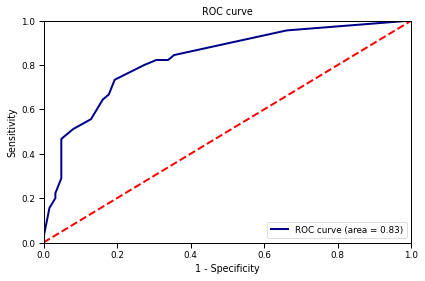

In [46]:
LogMultiROC(m_variables, 'CISC', df)

### Male

In [47]:
cont=pd.crosstab(dfM['PPI'], dfM['CISC'])
chi, p, dof, expected = scipy.stats.chi2_contingency(cont)
print(p)

0.00031465992877316527


In [48]:
s_variables = ['Age', 'DO', 'BOO', 'PVR', 'log PVR', 'PPI', 'Neuropathic', 'Mirabegron', 'Anticholinergics', 'Qmax', 'Prostate size (ml)', 'Incontinence surgery', 'Dose>100', 'SUI', 'UUI']
LogUni(s_variables, 'CISC', dfM)

Optimization terminated successfully.
         Current function value: 0.670600
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674733
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.668190
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.494433
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495440
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530993
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.655189
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645387
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.679697
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.599630
  

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsa

Optimization terminated successfully.
         Current function value: 0.600161
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.639239
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662277
         Iterations 4


C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])


,5%,95%,Odds Ratio,95% CI,P-value
Age,0.948701,1.017451,0.982475,0.95 - 1.02,0.321867
DO,0.143386,2.070531,0.544872,0.14 - 2.07,0.372686
BOO,0.585629,9.691475,2.382353,0.59 - 9.69,0.225296
PVR,1.011670,1.051232,1.031261,1.01 - 1.05,0.001658
log PVR,2.101488,10.868832,4.779197,2.10 - 10.87,0.000190
PPI,0.019070,0.323722,0.078571,0.02 - 0.32,0.000430
Neuropathic,0.798113,10.392516,2.880000,0.80 - 10.39,0.106191
Mirabegron,0.018494,1.424949,0.162338,0.02 - 1.42,0.100916
Anticholinergics,0.270979,3.631979,0.992063,0.27 - 3.63,0.990398
Qmax,0.775107,0.990773,0.876331,0.78 - 0.99,0.035032


In [49]:
m_variables = ['log PVR', 'PPI', 'Dose>100']
LogMulti(m_variables, 'CISC', dfM)

Optimization terminated successfully.
         Current function value: 0.414273
         Iterations 7


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,5%,95%,Odds Ratio,95% CI,P-value
const,0.093028,1.615667,0.387689,0.09 - 1.62,0.193199
log PVR,1.060879,7.442961,2.809997,1.06 - 7.44,0.037629
PPI,0.017629,0.592581,0.102208,0.02 - 0.59,0.010974
Dose>100,0.489866,30.460685,3.862856,0.49 - 30.46,0.199615


### Female

In [50]:
s_variables = ['Age', 'DO', 'BOO', 'PVR', 'log PVR', 'Neuropathic', 'Mirabegron', 'Anticholinergics', 'Qmax', 'Hysterectomy', 'Incontinence surgery', 'SUI', 'UUI', 'Dose>100']
LogUni(s_variables, 'CISC', dfF)

Optimization terminated successfully.
         Current function value: 0.669700
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659555
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.633682
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.506890
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576702
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663408
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670888
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.668222
         Iterations 4


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsa

Optimization terminated successfully.
         Current function value: 0.681809
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671918
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662754
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.646442
         Iterations 5


C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:

Optimization terminated successfully.
         Current function value: 0.673992
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.647116
         Iterations 5


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\AppData\Local\Temp/ipykernel_19912/94270441.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(conf.iloc[1])


,5%,95%,Odds Ratio,95% CI,P-value
Age,0.955349,1.019073,0.986696,0.96 - 1.02,0.416204
DO,0.638482,8.702084,2.357143,0.64 - 8.70,0.198200
BOO,1.015881,31.146003,5.625000,1.02 - 31.15,0.047928
PVR,1.013530,1.057609,1.035335,1.01 - 1.06,0.001386
log PVR,1.494192,6.349883,3.080250,1.49 - 6.35,0.002304
Neuropathic,0.610353,6.823802,2.040816,0.61 - 6.82,0.246743
Mirabegron,0.446583,5.912949,1.625000,0.45 - 5.91,0.461291
Anticholinergics,0.361682,15.509268,2.368421,0.36 - 15.51,0.368507
Qmax,0.912190,1.038308,0.973208,0.91 - 1.04,0.411051
Hysterectomy,0.399504,6.314058,1.588235,0.40 - 6.31,0.511198


In [51]:
m_variables = ['log PVR', 'SUI']
LogMulti(m_variables, 'CISC', dfF)

Optimization terminated successfully.
         Current function value: 0.551584
         Iterations 6


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,5%,95%,Odds Ratio,95% CI,P-value
const,0.127468,1.072034,0.369662,0.13 - 1.07,0.066963
log PVR,1.473772,6.504244,3.096090,1.47 - 6.50,0.002845
SUI,0.099415,1.252589,0.352883,0.10 - 1.25,0.107065


In [52]:
m_variables = ['PVR>=50', 'Dose>100', 'SUI', 'Neuropathic', 'Prostate']
logmodel = LogMulti(m_variables, 'CISC', df)

Optimization terminated successfully.
         Current function value: 0.528816
         Iterations 6


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,5%,95%,Odds Ratio,95% CI,P-value
const,0.133881,0.679494,0.301615,0.13 - 0.68,0.003823
PVR>=50,2.105200,16.130387,5.827323,2.11 - 16.13,0.000691
Dose>100,0.820970,11.428700,3.063106,0.82 - 11.43,0.095650
SUI,0.202449,1.626975,0.573915,0.20 - 1.63,0.296276
Neuropathic,0.439812,3.997543,1.325959,0.44 - 4.00,0.616307
Prostate,0.799239,6.721317,2.317745,0.80 - 6.72,0.121759


In [53]:
from tkinter import *
from tkinter import messagebox

class App:

    def __init__(self,parent):

        self.parent = parent

        self.frame_1 = Frame(parent)

        self.frame_1.pack()
        
        self.Prostate = IntVar()
        self.PVR = IntVar()
        self.SUI = IntVar()
        self.dose = IntVar()
        self.Neuro = IntVar()



        self.lbl_1 = Label(self.frame_1,text="PVR >= 50mL")

        self.lbl_1.grid(row=0,column=1)

        self.entry_1 = Checkbutton(self.frame_1, variable = self.PVR)

        self.entry_1.grid(row=0,column=0)
        



        
        
        self.lbl_2 = Label(self.frame_1,text="Dose greater than 100 units")

        self.lbl_2.grid(row=2,column=1)

        self.entry_2 = Checkbutton(self.frame_1, variable = self.dose)

        self.entry_2.grid(row=2,column=0)
        
        
        self.lbl_3 = Label(self.frame_1,text="Stress urinary incontinence")

        self.lbl_3.grid(row=1,column=1)

        self.entry_3 = Checkbutton(self.frame_1, variable = self.SUI)

        self.entry_3.grid(row=1,column=0)
        
        
        self.lbl_4 = Label(self.frame_1,text="Neuropathic")

        self.lbl_4.grid(row=3,column=1)

        self.entry_4 = Checkbutton(self.frame_1, variable = self.Neuro)

        self.entry_4.grid(row=3,column=0)
        
        
        self.lbl_5 = Label(self.frame_1,text="Prostate")

        self.lbl_5.grid(row=4,column=1)

        self.entry_5 = Checkbutton(self.frame_1, variable = self.Prostate)

        self.entry_5.grid(row=4,column=0)



        self.btn_1 = Button(parent,text="Calculate",command=self.calc_isc)

        self.btn_1.pack(pady=8)


    def calc_isc(self):
        result = logmodel.predict([1, self.PVR.get(), self.dose.get(), self.SUI.get(), self.Neuro.get(), self.Prostate.get()])[0]*100
        messagebox.showinfo("Probability of ISC","{:.2f}% chance of self-catheterisation".format(result))
        

root=Tk()

root.title("Botox ISC Calculator")

app = App(root)

root.mainloop()

In [54]:
logmodel.save('botox.pickle')

In [57]:
from sklearn.utils import resample
var = m_variables + ['CISC']
df_m = df[var]
df_m = df_m.dropna()
y = df_m['CISC']
X = sm.add_constant(df_m[m_variables])
values = X.values

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [58]:
train = resample(df_m, n_samples =int(len(X)))
Z= sm.add_constant(train[m_variables])
logmodel=sm.Logit(train['CISC'], Z).fit()
y_score = logmodel.predict(Z)
fpr, tpr, thresh = roc_curve(train['CISC'], y_score)
roc_auc= auc(fpr, tpr)
print(roc_auc)
corig = logmodel.predict(X)
fpr, tpr, thresh = roc_curve(y, corig)
roc_auc= auc(fpr, tpr)
print(roc_auc)
train.head()

Optimization terminated successfully.
         Current function value: 0.335671
         Iterations 7
0.927906976744186
0.782363315696649


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,PVR>=50,Dose>100,SUI,Neuropathic,Prostate,CISC
39,1,0,0.0,1,1,1
6,1,0,0.0,0,1,1
39,1,0,0.0,1,1,1
79,0,0,0.0,0,0,0
86,0,0,0.0,0,0,0


In [59]:
n_iterations = 2000
scores = []
for i in range(n_iterations):
    train = resample(df_m, n_samples =int(len(X)))
    Z= sm.add_constant(train[m_variables])
    try:
        logmodel=sm.Logit(train['CISC'], Z).fit()
        y_score = logmodel.predict(Z)
        fpr, tpr, thresh = roc_curve(train['CISC'], y_score)
        roc_auc= auc(fpr, tpr)
        print(roc_auc)
        corig = logmodel.predict(X)
        fpr, tpr, thresh = roc_curve(y, corig)
        roc_og= auc(fpr, tpr)
        optimism = roc_auc - roc_og
        scores.append(optimism)
    except:
        pass

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.536331
         Iterations 7
0.8029159519725557
Optimization terminated successfully.
         Current function value: 0.433565
         Iterations 7
0.8736111111111111
Optimization terminated successfully.
         Current function value: 0.454074
         Iterations 6
0.8519176136363636
Optimization terminated successfully.
         Current function value: 0.492388
         Iterations 6
0.8267361111111111
Optimization terminated successfully.
         Current function value: 0.497743
         Iterations 6
0.8170138888888888
Optimization terminated successfully.
         Current function value: 0.527286
         Iterations 6
0.8057359307359307
Optimization terminated successfully.
         Current function value: 0.467553
         Iterations 6
0.8162257495590829
Optimization terminated successfully.
         Current function value: 0.524458
         Iterations 6
0.8149294805641555
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.553650
         Iterations 6
0.7863511659807956
Optimization terminated successfully.
         Current function value: 0.409530
         Iterations 6
0.8673076923076923
Optimization terminated successfully.
         Current function value: 0.537730
         Iterations 6
0.7816796729840207
Optimization terminated successfully.
         Current function value: 0.539809
         Iterations 5
0.7873161764705883
Optimization terminated successfully.
         Current function value: 0.436491
         Iterations 6
0.8479452054794521
Optimization terminated successfully.
         Current function value: 0.459161
         Iterations 6
0.8517279821627648
Optimization terminated successfully.
         Current function value: 0.483128
         Iterations 6
0.8490566037735849
Optimization terminated successfully.
         Current function value: 0.516598
         Iterations 6
0.8108846013833272
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8125
Optimization terminated successfully.
         Current function value: 0.384006
         Iterations 7
0.9003577817531305
Optimization terminated successfully.
         Current function value: 0.408777
         Iterations 7
0.8734983618492902
Optimization terminated successfully.
         Current function value: 0.490611
         Iterations 6
0.8441558441558442
Optimization terminated successfully.
         Current function value: 0.410415
         Iterations 7
0.8894827586206896
Optimization terminated successfully.
         Current function value: 0.602459
         Iterations 5
0.7225274725274726
Optimization terminated successfully.
         Current function value: 0.488442
         Iterations 7
0.8543773979769794
Optimization terminated successfully.
         Current function value: 0.419703
         Iterations 7
0.8644736842105263
Optimization terminated successfully.
         Current function value: 0.497668
         Iterations 7
0.8300347222222222
Optimization terminated s

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8820689655172413
Optimization terminated successfully.
         Current function value: 0.499461
         Iterations 6
0.8064683500518851
Optimization terminated successfully.
         Current function value: 0.540360
         Iterations 6
0.7735849056603774
Optimization terminated successfully.
         Current function value: 0.565483
         Iterations 6
0.763671875
Optimization terminated successfully.
         Current function value: 0.418219
         Iterations 7
0.8858173076923077
Optimization terminated successfully.
         Current function value: 0.454266
         Iterations 6
0.8223370429252783
Optimization terminated successfully.
         Current function value: 0.552281
         Iterations 5
0.7998934659090909
Optimization terminated successfully.
         Current function value: 0.401994
         Iterations 7
0.8794117647058823
Optimization terminated successfully.
         Current function value: 0.552798
         Iterations 5
0.7637422642883145
Optimization termina

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.555179
         Iterations 6
0.7825396825396825
Optimization terminated successfully.
         Current function value: 0.439366
         Iterations 6
0.8354207436399217
Optimization terminated successfully.
         Current function value: 0.468586
         Iterations 6
0.8515870247645623
Optimization terminated successfully.
         Current function value: 0.462634
         Iterations 7
0.8607486263736264
Optimization terminated successfully.
         Current function value: 0.416199
         Iterations 7
0.8625
Optimization terminated successfully.
         Current function value: 0.477375
         Iterations 6
0.8321805606115763
Optimization terminated successfully.
         Current function value: 0.505569
         Iterations 6
0.8044994768050227
Optimization terminated successfully.
         Current function value: 0.510168
         Iterations 6
0.7881747159090908
Optimization terminated successfully.
      

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8141954663693793
Optimization terminated successfully.
         Current function value: 0.509733
         Iterations 6
0.8204773434797648
Optimization terminated successfully.
         Current function value: 0.566835
         Iterations 6
0.7433380084151473
Optimization terminated successfully.
         Current function value: 0.524882
         Iterations 6
0.8223958333333333
Optimization terminated successfully.
         Current function value: 0.600724
         Iterations 5
0.7377049180327869
Optimization terminated successfully.
         Current function value: 0.541546
         Iterations 6
0.7940115440115441
Optimization terminated successfully.
         Current function value: 0.546054
         Iterations 6
0.7906525573192241
Optimization terminated successfully.
         Current function value: 0.579801
         Iterations 5
0.7233664772727272
Optimization terminated successfully.
         Current function value: 0.412483
         Iterations 6
0.8869791666666667
Optimization 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.500589
         Iterations 6
0.8167613636363635
Optimization terminated successfully.
         Current function value: 0.476825
         Iterations 7
0.8407125562089243
Optimization terminated successfully.
         Current function value: 0.467385
         Iterations 6
0.8081825657894737
Optimization terminated successfully.
         Current function value: 0.500861
         Iterations 7
0.8314985795454545
Optimization terminated successfully.
         Current function value: 0.475919
         Iterations 6
0.838855946982909
Optimization terminated successfully.
         Current function value: 0.454835
         Iterations 7
0.8723625043237634
Optimization terminated successfully.
         Current function value: 0.486659
         Iterations 6
0.8559322033898306
Optimization terminated successfully.
         Current function value: 0.587871
         Iterations 5
0.7173279941754641
Optimization terminated successfu

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.476982
         Iterations 6
0.829012784090909
Optimization terminated successfully.
         Current function value: 0.571143
         Iterations 5
0.7481203007518797
Optimization terminated successfully.
         Current function value: 0.484159
         Iterations 6
0.8204116638078901
Optimization terminated successfully.
         Current function value: 0.482603
         Iterations 6
0.8409487268922219
Optimization terminated successfully.
         Current function value: 0.506841
         Iterations 6
0.7638494318181819
Optimization terminated successfully.
         Current function value: 0.524425
         Iterations 6
0.8278463648834019
Optimization terminated successfully.
         Current function value: 0.523361
         Iterations 6
0.8279310344827587
Optimization terminated successfully.
         Current function value: 0.543170
         Iterations 5
0.7853957636566331
Optimization terminated successfu

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8980823863636364
Optimization terminated successfully.
         Current function value: 0.559797
         Iterations 5
0.7626838235294118
Optimization terminated successfully.
         Current function value: 0.618276
         Iterations 5
0.7231061916291941
Optimization terminated successfully.
         Current function value: 0.520714
         Iterations 6
0.8023298143429195
Optimization terminated successfully.
         Current function value: 0.484785
         Iterations 6
0.8389151801965782
Optimization terminated successfully.
         Current function value: 0.552217
         Iterations 6
0.7913804945054945
Optimization terminated successfully.
         Current function value: 0.577714
         Iterations 5
0.7942708333333334
Optimization terminated successfully.
         Current function value: 0.471058
         Iterations 6
0.8249289772727273
Optimization terminated successfully.
         Current function value: 0.513501
         Iterations 6
0.8131944444444444
Optimization 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.505094
         Iterations 6
0.8262435677530018
Optimization terminated successfully.
         Current function value: 0.522951
         Iterations 6
0.8126984126984127
Optimization terminated successfully.
         Current function value: 0.506299
         Iterations 6
0.8052420822715689
Optimization terminated successfully.
         Current function value: 0.560190
         Iterations 6
0.7597378958864215
Optimization terminated successfully.
         Current function value: 0.512652
         Iterations 6
0.7977627840909092
Optimization terminated successfully.
         Current function value: 0.529554
         Iterations 6
0.761842105263158
Optimization terminated successfully.
         Current function value: 0.543638
         Iterations 5
0.8046875
Optimization terminated successfully.
         Current function value: 0.558057
         Iterations 6
0.7738053714684339
Optimization terminated successfully.
    

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8458976157082749
Optimization terminated successfully.
         Current function value: 0.499622
         Iterations 6
0.8232323232323232
Optimization terminated successfully.
         Current function value: 0.521074
         Iterations 6
0.8065015479876161
Optimization terminated successfully.
         Current function value: 0.489655
         Iterations 6
0.8071945184621241
Optimization terminated successfully.
         Current function value: 0.577122
         Iterations 5
0.7428103385511466
Optimization terminated successfully.
         Current function value: 0.491520
         Iterations 6
0.8332741477272727
Optimization terminated successfully.
         Current function value: 0.482033
         Iterations 6
0.8500881834215167
Optimization terminated successfully.
         Current function value: 0.480386
         Iterations 6
0.8624338624338624
Optimization terminated successfully.
         Current function value: 0.373349
         Iterations 7
0.9127586206896552
Optimization 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.428000
         Iterations 6
0.8545869813475446
Optimization terminated successfully.
         Current function value: 0.501075
         Iterations 5
0.798747763864043
Optimization terminated successfully.
         Current function value: 0.473753
         Iterations 6
0.8447916666666666
Optimization terminated successfully.
         Current function value: 0.453689
         Iterations 7
0.84765625
Optimization terminated successfully.
         Current function value: 0.563425
         Iterations 5
0.772663139329806
Optimization terminated successfully.
         Current function value: 0.577658
         Iterations 5
0.7521618817018334
Optimization terminated successfully.
         Current function value: 0.528222
         Iterations 6
0.7933823529411764
Optimization terminated successfully.
         Current function value: 0.582854
         Iterations 5
0.7490408092082316
Optimization terminated successfully.
    

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.533672
         Iterations 6
0.8282647584973166
Optimization terminated successfully.
         Current function value: 0.486680
         Iterations 6
0.825
Optimization terminated successfully.
         Current function value: 0.518183
         Iterations 6
0.8106617647058824
Optimization terminated successfully.
         Current function value: 0.478146
         Iterations 6
0.8067129629629629
Optimization terminated successfully.
         Current function value: 0.565425
         Iterations 5
0.7255639097744361
Optimization terminated successfully.
         Current function value: 0.442725
         Iterations 7
0.8660589060308557
Optimization terminated successfully.
         Current function value: 0.552630
         Iterations 6
0.7845371669004207
Optimization terminated successfully.
         Current function value: 0.462368
         Iterations 7
0.8445969125214408
Optimization terminated successfully.
       

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8143429195485985
Optimization terminated successfully.
         Current function value: 0.555729
         Iterations 6
0.8022440392706872
Optimization terminated successfully.
         Current function value: 0.558057
         Iterations 6
0.7632307160152196
Optimization terminated successfully.
         Current function value: 0.607543
         Iterations 5
0.7155563306592256
Optimization terminated successfully.
         Current function value: 0.355102
         Iterations 7
0.895340371314161
Optimization terminated successfully.
         Current function value: 0.473098
         Iterations 6
0.8501891984864121
Optimization terminated successfully.
         Current function value: 0.557673
         Iterations 5
0.7918470418470418
Optimization terminated successfully.
         Current function value: 0.386495
         Iterations 7
0.8869485294117647
Optimization terminated successfully.
         Current function value: 0.555020
         Iterations 6
0.7862778730703259
Optimization t

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.7964726631393299
Optimization terminated successfully.
         Current function value: 0.526030
         Iterations 6
0.8090338332752005
Optimization terminated successfully.
         Current function value: 0.500215
         Iterations 6
0.8253968253968255
Optimization terminated successfully.
         Current function value: 0.449986
         Iterations 7
0.8384232954545454
Optimization terminated successfully.
         Current function value: 0.541627
         Iterations 7
0.7585139318885449
Optimization terminated successfully.
         Current function value: 0.519345
         Iterations 6
0.8232819074333801
Optimization terminated successfully.
         Current function value: 0.554605
         Iterations 6
0.7867620751341682
Optimization terminated successfully.
         Current function value: 0.538507
         Iterations 6
0.8190972222222224
Optimization terminated successfully.
         Current function value: 0.560889
         Iterations 6
0.7397058823529411
Optimization 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.588677
         Iterations 5
0.7917251051893408
Optimization terminated successfully.
         Current function value: 0.509449
         Iterations 6
0.8265625
Optimization terminated successfully.
         Current function value: 0.537571
         Iterations 6
0.8082990397805212
Optimization terminated successfully.
         Current function value: 0.544786
         Iterations 6
0.7772569444444446
Optimization terminated successfully.
         Current function value: 0.492699
         Iterations 6
0.8219105113636364
Optimization terminated successfully.
         Current function value: 0.450541
         Iterations 7
0.8539737654320988
Optimization terminated successfully.
         Current function value: 0.469230
         Iterations 6
0.8254459410265744
Optimization terminated successfully.
         Current function value: 0.385207
         Iterations 7
0.8680776014109348
Optimization terminated successfully.
   

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.440004
         Iterations 6
0.8598211214310285
Optimization terminated successfully.
         Current function value: 0.470924
         Iterations 6
0.8420094648707681
Optimization terminated successfully.
         Current function value: 0.548909
         Iterations 5
0.7586466165413533
Optimization terminated successfully.
         Current function value: 0.451129
         Iterations 7
0.8367812061711081
Optimization terminated successfully.
         Current function value: 0.557357
         Iterations 5
0.7664902998236331
Optimization terminated successfully.
         Current function value: 0.462990
         Iterations 6
0.8765432098765432
Optimization terminated successfully.
         Current function value: 0.498605
         Iterations 6
0.830514705882353
Optimization terminated successfully.
         Current function value: 0.518970
         Iterations 6
0.8007609823590452
Optimization terminated successfu

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.455362
         Iterations 6
0.8286882199925678
Optimization terminated successfully.
         Current function value: 0.487796
         Iterations 6
0.8572931276297335
Optimization terminated successfully.
         Current function value: 0.512058
         Iterations 6
0.8101332398316972
Optimization terminated successfully.
         Current function value: 0.428879
         Iterations 6
0.8851851851851852
Optimization terminated successfully.
         Current function value: 0.532148
         Iterations 6
0.774264705882353
Optimization terminated successfully.
         Current function value: 0.525248
         Iterations 6
0.8218694885361553
Optimization terminated successfully.
         Current function value: 0.426598
         Iterations 7
0.869485294117647
Optimization terminated successfully.
         Current function value: 0.475268
         Iterations 7
0.8643057503506311
Optimization terminated successful

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8523662551440329
Optimization terminated successfully.
         Current function value: 0.424042
         Iterations 7
0.8640429338103757
Optimization terminated successfully.
         Current function value: 0.444179
         Iterations 6
0.8670840787119856
Optimization terminated successfully.
         Current function value: 0.515090
         Iterations 6
0.8096590909090909
Optimization terminated successfully.
         Current function value: 0.410304
         Iterations 7
0.9028601325427277
Optimization terminated successfully.
         Current function value: 0.452706
         Iterations 6
0.8002782193958665
Optimization terminated successfully.
         Current function value: 0.505287
         Iterations 6
0.8209961950882048
Optimization terminated successfully.
         Current function value: 0.603567
         Iterations 5
0.738046095631235
Optimization terminated successfully.
         Current function value: 0.555261
         Iterations 6
0.7789022298456262
Optimization t

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.445603
         Iterations 6
0.8660107334525939
Optimization terminated successfully.
         Current function value: 0.564472
         Iterations 5
0.7760416666666667
Optimization terminated successfully.
         Current function value: 0.427907
         Iterations 7
0.8754756139744033
Optimization terminated successfully.
         Current function value: 0.579663
         Iterations 6
0.7715277777777778
Optimization terminated successfully.
         Current function value: 0.561736
         Iterations 5
0.7846320346320347
Optimization terminated successfully.
         Current function value: 0.548454
         Iterations 6
0.8008241758241758
Optimization terminated successfully.
         Current function value: 0.527279
         Iterations 6
0.8075862068965517
Optimization terminated successfully.
         Current function value: 0.517748
         Iterations 6
0.8324032089291942
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.524613
         Iterations 6
0.8157894736842105
Optimization terminated successfully.
         Current function value: 0.578642
         Iterations 5
0.759425804219993
Optimization terminated successfully.
         Current function value: 0.395353
         Iterations 7
0.9009287925696595
Optimization terminated successfully.
         Current function value: 0.526864
         Iterations 6
0.7800071022727273
Optimization terminated successfully.
         Current function value: 0.546723
         Iterations 6
0.7779909312870597
Optimization terminated successfully.
         Current function value: 0.500023
         Iterations 6
0.8395252837977296
Optimization terminated successfully.
         Current function value: 0.370592
         Iterations 8
0.8840729274165806
Optimization terminated successfully.
         Current function value: 0.549429
         Iterations 6
0.7797349145448204
Optimization terminated successfu

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8227513227513228
Optimization terminated successfully.
         Current function value: 0.503548
         Iterations 6
0.8188990182328191
Optimization terminated successfully.
         Current function value: 0.503332
         Iterations 6
0.7981617647058823
Optimization terminated successfully.
         Current function value: 0.499364
         Iterations 6
0.8416815742397138
Optimization terminated successfully.
         Current function value: 0.489380
         Iterations 6
0.8079004329004329
Optimization terminated successfully.
         Current function value: 0.507907
         Iterations 6
0.8256392045454546
Optimization terminated successfully.
         Current function value: 0.631563
         Iterations 5
0.6677769985974754
Optimization terminated successfully.
         Current function value: 0.473035
         Iterations 6
0.8550140252454418
Optimization terminated successfully.
         Current function value: 0.531284
         Iterations 6
0.8039762818276943
Optimization 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.484534
         Iterations 6
0.8434343434343434
Optimization terminated successfully.
         Current function value: 0.402749
         Iterations 6
0.8721664808621331
Optimization terminated successfully.
         Current function value: 0.472615
         Iterations 7
0.8274305555555556
Optimization terminated successfully.
         Current function value: 0.367046
         Iterations 7
0.8964026288481495
Optimization terminated successfully.
         Current function value: 0.480256
         Iterations 6
0.8525862068965517
Optimization terminated successfully.
         Current function value: 0.535939
         Iterations 6
0.8060966810966812
Optimization terminated successfully.
         Current function value: 0.571988
         Iterations 6
0.7733516483516484
Optimization terminated successfully.
         Current function value: 0.524216
         Iterations 6
0.8297685834502104
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8281024531024531
Optimization terminated successfully.
         Current function value: 0.533348
         Iterations 6
0.808641975308642
Optimization terminated successfully.
         Current function value: 0.524008
         Iterations 6
0.80608228980322
Optimization terminated successfully.
         Current function value: 0.422827
         Iterations 7
0.8813113604488079
Optimization terminated successfully.
         Current function value: 0.471227
         Iterations 7
0.8367066895368782
Optimization terminated successfully.
         Current function value: 0.548405
         Iterations 6
0.778450363196126
Optimization terminated successfully.
         Current function value: 0.493409
         Iterations 6
0.8161976911976911
Optimization terminated successfully.
         Current function value: 0.457009
         Iterations 6
0.8526334147192186
Optimization terminated successfully.
         Current function value: 0.468919
         Iterations 6
0.8541446208112875
Optimization term

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8587373561213812
Optimization terminated successfully.
         Current function value: 0.464787
         Iterations 6
0.851063829787234
Optimization terminated successfully.
         Current function value: 0.542262
         Iterations 6
0.7952265652023522
Optimization terminated successfully.
         Current function value: 0.550610
         Iterations 6
0.8028846153846154
Optimization terminated successfully.
         Current function value: 0.450433
         Iterations 6
0.8454677830360393
Optimization terminated successfully.
         Current function value: 0.497264
         Iterations 6
0.8420689655172414
Optimization terminated successfully.
         Current function value: 0.499696
         Iterations 6
0.8257363253856943
Optimization terminated successfully.
         Current function value: 0.399547
         Iterations 7
0.8779411764705882
Optimization terminated successfully.
         Current function value: 0.498040
         Iterations 6
0.8343394886363635
Optimization t

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.789655172413793
Optimization terminated successfully.
         Current function value: 0.572926
         Iterations 6
0.7572916666666667
Optimization terminated successfully.
         Current function value: 0.510918
         Iterations 7
0.8253199584918713
Optimization terminated successfully.
         Current function value: 0.539140
         Iterations 5
0.792827945001858
Optimization terminated successfully.
         Current function value: 0.535934
         Iterations 6
0.8089445438282648
Optimization terminated successfully.
         Current function value: 0.511640
         Iterations 6
0.8286060186786579
Optimization terminated successfully.
         Current function value: 0.416213
         Iterations 7
0.8931985294117648
Optimization terminated successfully.
         Current function value: 0.451915
         Iterations 6
0.8632717125915592
Optimization terminated successfully.
         Current function value: 0.585621
         Iterations 6
0.7301587301587302
Optimization te

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.521738
         Iterations 6
0.8258620689655172
Optimization terminated successfully.
         Current function value: 0.549514
         Iterations 6
0.751984126984127
Optimization terminated successfully.
         Current function value: 0.369866
         Iterations 7
0.881994670727065
Optimization terminated successfully.
         Current function value: 0.497315
         Iterations 6
0.8417968750000001
Optimization terminated successfully.
         Current function value: 0.499159
         Iterations 7
0.8388203017832647
Optimization terminated successfully.
         Current function value: 0.493356
         Iterations 6
0.8229282794500185
Optimization terminated successfully.
         Current function value: 0.617500
         Iterations 5
0.7040564373897706
Optimization terminated successfully.
         Current function value: 0.523475
         Iterations 6
0.8189624329159213
Optimization terminated successful

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.428625
         Iterations 7
0.8940966010733453
Optimization terminated successfully.
         Current function value: 0.589653
         Iterations 5
0.7437931034482759
Optimization terminated successfully.
         Current function value: 0.459849
         Iterations 7
0.8494039270687236
Optimization terminated successfully.
         Current function value: 0.536255
         Iterations 6
0.8070689655172415
Optimization terminated successfully.
         Current function value: 0.510496
         Iterations 6
0.8076082999635966
Optimization terminated successfully.
         Current function value: 0.445483
         Iterations 6
0.8382185001903312
Optimization terminated successfully.
         Current function value: 0.602493
         Iterations 5
0.7417241379310345
Optimization terminated successfully.
         Current function value: 0.508121
         Iterations 6
0.8296740994854201
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8584451324389405
Optimization terminated successfully.
         Current function value: 0.497000
         Iterations 6
0.8289879931389365
Optimization terminated successfully.
         Current function value: 0.467220
         Iterations 6
0.8467013888888889
Optimization terminated successfully.
         Current function value: 0.513900
         Iterations 6
0.8089826839826839
Optimization terminated successfully.
         Current function value: 0.444421
         Iterations 6
0.8412422839506174
Optimization terminated successfully.
         Current function value: 0.514200
         Iterations 6
0.7725542443852302
Optimization terminated successfully.
         Current function value: 0.578278
         Iterations 5
0.7624356775300172
Optimization terminated successfully.
         Current function value: 0.428732
         Iterations 7
0.8784340659340659
Optimization terminated successfully.
         Current function value: 0.515112
         Iterations 6
0.8386404293381037
Optimization 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.520338
         Iterations 6
0.8259943181818182
Optimization terminated successfully.
         Current function value: 0.561750
         Iterations 6
0.7874785591766723
Optimization terminated successfully.
         Current function value: 0.440671
         Iterations 7
0.8427864484202512
Optimization terminated successfully.
         Current function value: 0.590745
         Iterations 5
0.7831903945111492
Optimization terminated successfully.
         Current function value: 0.548888
         Iterations 6
0.7839697282421741
Optimization terminated successfully.
         Current function value: 0.534721
         Iterations 6
0.7972184065934065
Optimization terminated successfully.
         Current function value: 0.471481
         Iterations 6
0.8422794117647059
Optimization terminated successfully.
         Current function value: 0.536275
         Iterations 6
0.7968965517241379
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.501966
         Iterations 6
0.828103448275862
Optimization terminated successfully.
         Current function value: 0.542785
         Iterations 6
0.8272569444444444
Optimization terminated successfully.
         Current function value: 0.514000
         Iterations 6
0.8075751808146174
Optimization terminated successfully.
         Current function value: 0.487939
         Iterations 6
0.8310273261847112
Optimization terminated successfully.
         Current function value: 0.499279
         Iterations 6
0.8073308270676692
Optimization terminated successfully.
         Current function value: 0.528929
         Iterations 6
0.7725563909774436
Optimization terminated successfully.
         Current function value: 0.497010
         Iterations 7
0.8275132275132275
Optimization terminated successfully.
         Current function value: 0.581461
         Iterations 6
0.7734347976478727
Optimization terminated successfu

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.365384
         Iterations 7
0.9325581395348836
Optimization terminated successfully.
         Current function value: 0.491000
         Iterations 6
0.8379453476305776
Optimization terminated successfully.
         Current function value: 0.533930
         Iterations 6
0.8116883116883117
Optimization terminated successfully.
         Current function value: 0.410252
         Iterations 6
0.8827812158718602
Optimization terminated successfully.
         Current function value: 0.482037
         Iterations 6
0.8128676470588235
Optimization terminated successfully.
         Current function value: 0.561525
         Iterations 5
0.763671875
Optimization terminated successfully.
         Current function value: 0.499199
         Iterations 6
0.8365808823529413
Optimization terminated successfully.
         Current function value: 0.530735
         Iterations 6
0.8141654978962132
Optimization terminated successfully.
 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.540564
         Iterations 6
0.8139052231061916
Optimization terminated successfully.
         Current function value: 0.564679
         Iterations 6
0.7499105545617173
Optimization terminated successfully.
         Current function value: 0.545795
         Iterations 6
0.7788600288600289
Optimization terminated successfully.
         Current function value: 0.493448
         Iterations 6
0.8384615384615385
Optimization terminated successfully.
         Current function value: 0.423380
         Iterations 7
0.8793402777777779
Optimization terminated successfully.
         Current function value: 0.468411
         Iterations 6
0.8336940836940837
Optimization terminated successfully.
         Current function value: 0.411153
         Iterations 7
0.8663419913419914
Optimization terminated successfully.
         Current function value: 0.445504
         Iterations 7
0.8742690058479532
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.486252
         Iterations 6
0.8298275862068967
Optimization terminated successfully.
         Current function value: 0.536012
         Iterations 6
0.7944827586206896
Optimization terminated successfully.
         Current function value: 0.496891
         Iterations 6
0.8336940836940838
Optimization terminated successfully.
         Current function value: 0.568657
         Iterations 6
0.7989187303801883
Optimization terminated successfully.
         Current function value: 0.454702
         Iterations 6
0.8469239170003641
Optimization terminated successfully.
         Current function value: 0.533806
         Iterations 6
0.7841281397888605
Optimization terminated successfully.
         Current function value: 0.532519
         Iterations 6
0.8087713068181819
Optimization terminated successfully.
         Current function value: 0.545157
         Iterations 6
0.779655172413793
Optimization terminated successfu

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8260645604395604
Optimization terminated successfully.
         Current function value: 0.419751
         Iterations 7
0.8909719694211868
Optimization terminated successfully.
         Current function value: 0.503025
         Iterations 6
0.8238095238095238
Optimization terminated successfully.
         Current function value: 0.445812
         Iterations 7
0.8564213564213564
Optimization terminated successfully.
         Current function value: 0.542763
         Iterations 6
0.7869769119769119
Optimization terminated successfully.
         Current function value: 0.527147
         Iterations 6
0.8035778175313059
Optimization terminated successfully.
         Current function value: 0.539684
         Iterations 6
0.8307005494505495
Optimization terminated successfully.
         Current function value: 0.487975
         Iterations 6
0.842548076923077
Optimization terminated successfully.
         Current function value: 0.428631
         Iterations 7
0.8492901346923917
Optimization t

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.465594
         Iterations 7
0.8431809736157562
Optimization terminated successfully.
         Current function value: 0.426193
         Iterations 7
0.8967391304347826
Optimization terminated successfully.
         Current function value: 0.541577
         Iterations 5
0.7988585264614321
Optimization terminated successfully.
         Current function value: 0.471023
         Iterations 6
0.8293678977272727
Optimization terminated successfully.
         Current function value: 0.485219
         Iterations 7
0.8353344768439108
Optimization terminated successfully.
         Current function value: 0.450316
         Iterations 6
0.8513563730955036
Optimization terminated successfully.
         Current function value: 0.543290
         Iterations 6
0.7850274725274725
Optimization terminated successfully.
         Current function value: 0.517308
         Iterations 7
0.8412068965517242
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.528725
         Iterations 6
0.7963564213564214
Optimization terminated successfully.
         Current function value: 0.560387
         Iterations 6
0.7602982954545454
Optimization terminated successfully.
         Current function value: 0.586063
         Iterations 5
0.7512019230769231
Optimization terminated successfully.
         Current function value: 0.496924
         Iterations 6
0.8338541666666667
Optimization terminated successfully.
         Current function value: 0.582025
         Iterations 5
0.7620751341681573
Optimization terminated successfully.
         Current function value: 0.476334
         Iterations 6
0.8327568315461777
Optimization terminated successfully.
         Current function value: 0.477670
         Iterations 7
0.8550140252454418
Optimization terminated successfully.
         Current function value: 0.577636
         Iterations 6
0.7578983516483516
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.8003527336860671
Optimization terminated successfully.
         Current function value: 0.563894
         Iterations 6
0.7742995503286061
Optimization terminated successfully.
         Current function value: 0.376727
         Iterations 7
0.9005960729312763
Optimization terminated successfully.
         Current function value: 0.530392
         Iterations 6
0.7961079943899018
Optimization terminated successfully.
         Current function value: 0.518634
         Iterations 6
0.8102292768959436
Optimization terminated successfully.
         Current function value: 0.534702
         Iterations 6
0.7937388193202146
Optimization terminated successfully.
         Current function value: 0.561965
         Iterations 5
0.7814788978025811
Optimization terminated successfully.
         Current function value: 0.500449
         Iterations 6
0.8380789022298456
Optimization terminated successfully.
         Current function value: 0.490294
         Iterations 6
0.8191413237924865
Optimization 

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.465679
         Iterations 6
0.8453822206848841
Optimization terminated successfully.
         Current function value: 0.502528
         Iterations 6
0.8453480113636364
Optimization terminated successfully.
         Current function value: 0.504683
         Iterations 6
0.8248998907899526
Optimization terminated successfully.
         Current function value: 0.473848
         Iterations 6
0.7970513287222425
Optimization terminated successfully.
         Current function value: 0.509862
         Iterations 6
0.8100694444444445
Optimization terminated successfully.
         Current function value: 0.354813
         Iterations 7
0.8975468975468976
Optimization terminated successfully.
         Current function value: 0.461563
         Iterations 6
0.859375
Optimization terminated successfully.
         Current function value: 0.441353
         Iterations 7
0.8627586206896551
Optimization terminated successfully.
    

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.492799
         Iterations 6
0.8229758522727272
Optimization terminated successfully.
         Current function value: 0.437962
         Iterations 6
0.8822916666666667
Optimization terminated successfully.
         Current function value: 0.521825
         Iterations 6
0.8192708333333334
Optimization terminated successfully.
         Current function value: 0.470824
         Iterations 6
0.8701252236135957
Optimization terminated successfully.
         Current function value: 0.439277
         Iterations 7
0.8846593071945185
Optimization terminated successfully.
         Current function value: 0.499150
         Iterations 6
0.8447227191413238
Optimization terminated successfully.
         Current function value: 0.430310
         Iterations 6
0.8554511278195488
Optimization terminated successfully.
         Current function value: 0.527085
         Iterations 6
0.7722970513287222
Optimization terminated successf

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Optimization terminated successfully.
         Current function value: 0.498289
         Iterations 6
0.835203366058906
Optimization terminated successfully.
         Current function value: 0.494413
         Iterations 6
0.8421875
Optimization terminated successfully.
         Current function value: 0.443714
         Iterations 7
0.8483005366726297
Optimization terminated successfully.
         Current function value: 0.518104
         Iterations 6
0.8222984562607205
Optimization terminated successfully.
         Current function value: 0.490910
         Iterations 6
0.8348322379799378
Optimization terminated successfully.
         Current function value: 0.570172
         Iterations 6
0.753448275862069
Optimization terminated successfully.
         Current function value: 0.504863
         Iterations 6
0.8372252747252746
Optimization terminated successfully.
         Current function value: 0.533564
         Iterations 6
0.7826758147512864
Optimization terminated successfully.
     

C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

0.6928210678210679
Optimization terminated successfully.
         Current function value: 0.536973
         Iterations 6
0.7736676016830295
Optimization terminated successfully.
         Current function value: 0.461946
         Iterations 7
0.8487966515521451
Optimization terminated successfully.
         Current function value: 0.442403
         Iterations 6
0.8567116477272727
Optimization terminated successfully.
         Current function value: 0.397629
         Iterations 7
0.8915951972555747
Optimization terminated successfully.
         Current function value: 0.472995
         Iterations 6
0.8611789326822463


C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\duskb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

In [60]:
#calculation of optimism
print(len(scores))
statistics.mean(scores)

1998


0.0359228682361295